# Plotting the incidences of BW counties

In [1]:
import pandas as pd    # Pandas is a library to analyse various data structures
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Here we read the csv-file holding the data.
# Note: the separator is a ; instead of a comma, all NA-values gave to be skipped
df_csv = pd.read_csv('/Users/greiner/Programming/Python/FreiburgSeminar/Infizierte.csv', sep=';',na_filter=False)
keys=df_csv.keys()

In [3]:
# Let us pack the counties names into a dictionary and number them
# e.g. {'Biberach': 1}
nkreise=np.arange(len(df_csv.to_numpy()[:,0]))
dict_kreise = dict(zip(df_csv.to_numpy()[:,0],nkreise))

In [4]:
data=df_csv.to_numpy()[:,1:]

In [33]:
# transform data to float
irange=np.arange(data.shape[0])
jrange=np.arange(data.shape[1])
datafloat=np.zeros(data.shape)
for i in irange: 
    for j in jrange:
        if data[i,j] =='': 
            datafloat[i,j]=0.
        else:
            datafloat[i,j]=float(data[i,j])
#
kreisliste = ['Emmendingen', 'Freiburg im Breisgau (Stadtkreis)','Ortenaukreis']

<IPython.core.display.Javascript object>


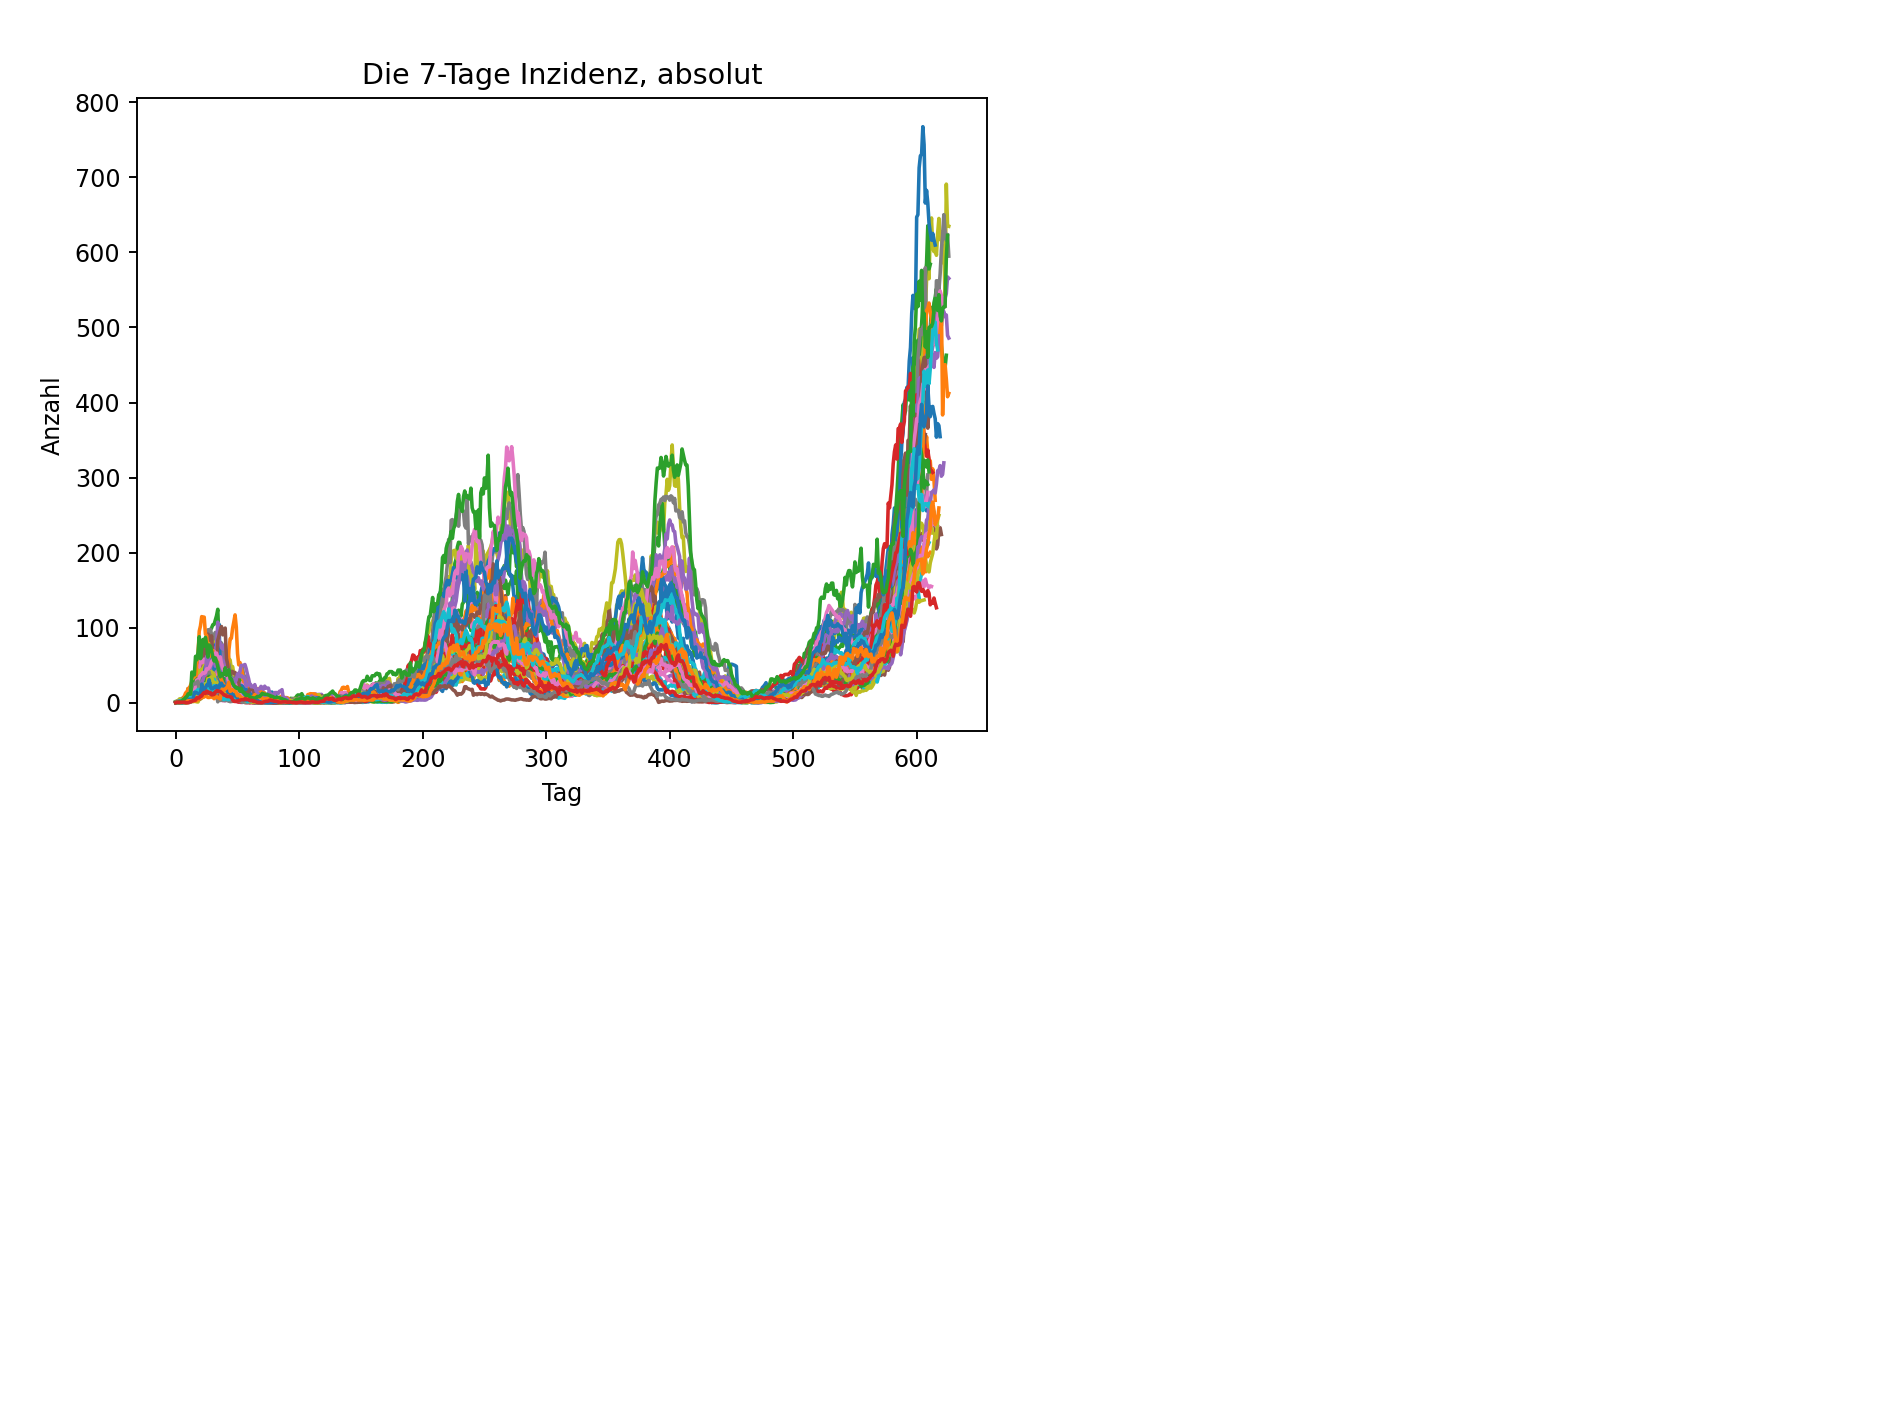

[Text(0, 0.5, 'Anzahl')]

In [45]:
%matplotlib notebook
fig, ax = plt.subplots() # let us plot the data
#for kreis in kreisliste:
for i in np.arange(44):
    #factor=1.e5/EWZahl[dict_kreise[kreis]]
    #y = np.flip(datafloat[dict_kreise[kreis]])
    y = np.flip(datafloat[i])
    delta = y - np.roll(y,shift=7)
    deltabool = delta > 0
    ax.plot(factor*delta[deltabool], label=kreis)
#
#ax.legend()
ax.set_title('Die 7-Tage Inzidenz, absolut')
ax.set(xlabel='Tag')
ax.set(ylabel='Anzahl')

In [16]:
dict_kreise

{'Alb-Donau-Kreis': 0,
 'Biberach': 1,
 'Böblingen': 2,
 'Bodenseekreis': 3,
 'Breisgau-Hochschwarzwald': 4,
 'Calw': 5,
 'Emmendingen': 6,
 'Enzkreis': 7,
 'Esslingen': 8,
 'Freudenstadt': 9,
 'Göppingen': 10,
 'Heidenheim': 11,
 'Heilbronn': 12,
 'Hohenlohekreis': 13,
 'Karlsruhe': 14,
 'Konstanz': 15,
 'Lörrach': 16,
 'Ludwigsburg': 17,
 'Main-Tauber-Kreis': 18,
 'Neckar-Odenwald-Kreis': 19,
 'Ortenaukreis': 20,
 'Ostalbkreis': 21,
 'Rastatt': 22,
 'Ravensburg': 23,
 'Rems-Murr-Kreis': 24,
 'Reutlingen': 25,
 'Rhein-Neckar-Kreis': 26,
 'Rottweil': 27,
 'Schwäbisch Hall': 28,
 'Schwarzwald-Baar-Kreis': 29,
 'Sigmaringen': 30,
 'Tübingen': 31,
 'Tuttlingen': 32,
 'Waldshut': 33,
 'Zollernalbkreis': 34,
 'Baden-Baden (Stadtkreis)': 35,
 'Freiburg im Breisgau (Stadtkreis)': 36,
 'Heidelberg (Stadtkreis)': 37,
 'Heilbronn (Stadtkreis)': 38,
 'Karlsruhe (Stadtkreis)': 39,
 'Mannheim (Stadtkreis)': 40,
 'Pforzheim (Stadtkreis)': 41,
 'Stuttgart': 42,
 'Ulm (Stadtkreis)': 43}

In [42]:
EWZahl = np.ones(44)
EWZahl[36] = 230940
EWZahl[6] = 166862
EWZahl[20] = 432580

In [28]:
df_csv.keys()

Index(['Stadt-/Landkreis', '12/7/21', '12/6/21', '12/5/21', '12/4/21',
       '12/3/21', '12/2/21', '12/1/21', '11/30/21', '11/29/21',
       ...
       '3/5/20', '3/4/20', '3/3/20', '3/2/20', '3/1/20', '2/29/20', '2/28/20',
       '2/27/20', '2/26/20', '2/25/20'],
      dtype='object', length=635)

In [29]:
data

array([[16201, 15991, 15950, ..., '', '', ''],
       [18462, 18250, 18225, ..., '', '', ''],
       [30766, 30315, 30276, ..., '1', '', ''],
       ...,
       [14786, 14570, 14356, ..., '', '', ''],
       [50404, 49714, 49046, ..., '', '', ''],
       [10510, 10416, 10379, ..., '', '', '']], dtype=object)

In [30]:
df_csv.to_numpy()[:,0]

array(['Alb-Donau-Kreis', 'Biberach', 'Böblingen', 'Bodenseekreis',
       'Breisgau-Hochschwarzwald', 'Calw', 'Emmendingen', 'Enzkreis',
       'Esslingen', 'Freudenstadt', 'Göppingen', 'Heidenheim',
       'Heilbronn', 'Hohenlohekreis', 'Karlsruhe', 'Konstanz', 'Lörrach',
       'Ludwigsburg', 'Main-Tauber-Kreis', 'Neckar-Odenwald-Kreis',
       'Ortenaukreis', 'Ostalbkreis', 'Rastatt', 'Ravensburg',
       'Rems-Murr-Kreis', 'Reutlingen', 'Rhein-Neckar-Kreis', 'Rottweil',
       'Schwäbisch Hall', 'Schwarzwald-Baar-Kreis', 'Sigmaringen',
       'Tübingen', 'Tuttlingen', 'Waldshut', 'Zollernalbkreis',
       'Baden-Baden (Stadtkreis)', 'Freiburg im Breisgau (Stadtkreis)',
       'Heidelberg (Stadtkreis)', 'Heilbronn (Stadtkreis)',
       'Karlsruhe (Stadtkreis)', 'Mannheim (Stadtkreis)',
       'Pforzheim (Stadtkreis)', 'Stuttgart', 'Ulm (Stadtkreis)'],
      dtype=object)

In [31]:
nkreise

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [39]:
dict_kreise

{'Alb-Donau-Kreis': 0,
 'Biberach': 1,
 'Böblingen': 2,
 'Bodenseekreis': 3,
 'Breisgau-Hochschwarzwald': 4,
 'Calw': 5,
 'Emmendingen': 6,
 'Enzkreis': 7,
 'Esslingen': 8,
 'Freudenstadt': 9,
 'Göppingen': 10,
 'Heidenheim': 11,
 'Heilbronn': 12,
 'Hohenlohekreis': 13,
 'Karlsruhe': 14,
 'Konstanz': 15,
 'Lörrach': 16,
 'Ludwigsburg': 17,
 'Main-Tauber-Kreis': 18,
 'Neckar-Odenwald-Kreis': 19,
 'Ortenaukreis': 20,
 'Ostalbkreis': 21,
 'Rastatt': 22,
 'Ravensburg': 23,
 'Rems-Murr-Kreis': 24,
 'Reutlingen': 25,
 'Rhein-Neckar-Kreis': 26,
 'Rottweil': 27,
 'Schwäbisch Hall': 28,
 'Schwarzwald-Baar-Kreis': 29,
 'Sigmaringen': 30,
 'Tübingen': 31,
 'Tuttlingen': 32,
 'Waldshut': 33,
 'Zollernalbkreis': 34,
 'Baden-Baden (Stadtkreis)': 35,
 'Freiburg im Breisgau (Stadtkreis)': 36,
 'Heidelberg (Stadtkreis)': 37,
 'Heilbronn (Stadtkreis)': 38,
 'Karlsruhe (Stadtkreis)': 39,
 'Mannheim (Stadtkreis)': 40,
 'Pforzheim (Stadtkreis)': 41,
 'Stuttgart': 42,
 'Ulm (Stadtkreis)': 43}

In [40]:
for kreis in kreisliste:
    print('{} hat die Nummer {}'.format(kreis,dict_kreise[kreis]))

Emmendingen hat die Nummer 6
Freiburg im Breisgau (Stadtkreis) hat die Nummer 36
Ortenaukreis hat die Nummer 20
